Pass Initial Test, Moving on to Loading Session...

Processing: x=0, y=recording1, exp=experiment1, yy=recording1

EXPERIMENT1, Recording 1
Open Ephys GUI Recording
ID: 0x1a246b8a810
Format: Binary
Directory: ABATE-008_2025-05-14_14-34-09_001\Record Node 111\experiment1\recording1
Experiment Index: 0
Recording Index: 0
Processor ID: 100, Stream Name: Rhythm Data, Line: 1 (main sync line))
  First event sample number: 2608253
  Last event sample number: 23693992
  Total sync events: 95
  Sample rate: 20000.0
Channels: ['CH1', 'CH5', 'CH7', 'CH11', 'ADC1'] 

Loaded 107 MessageCenter entries
[Time: 130.389750 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 139.462850 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 145.284600 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 150.166400 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 162.797750 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 198.514650 s] Message: Laster several stims have been at 3 mA. Single Pulse 500us PW
[Time: 216.603300 s] Messag

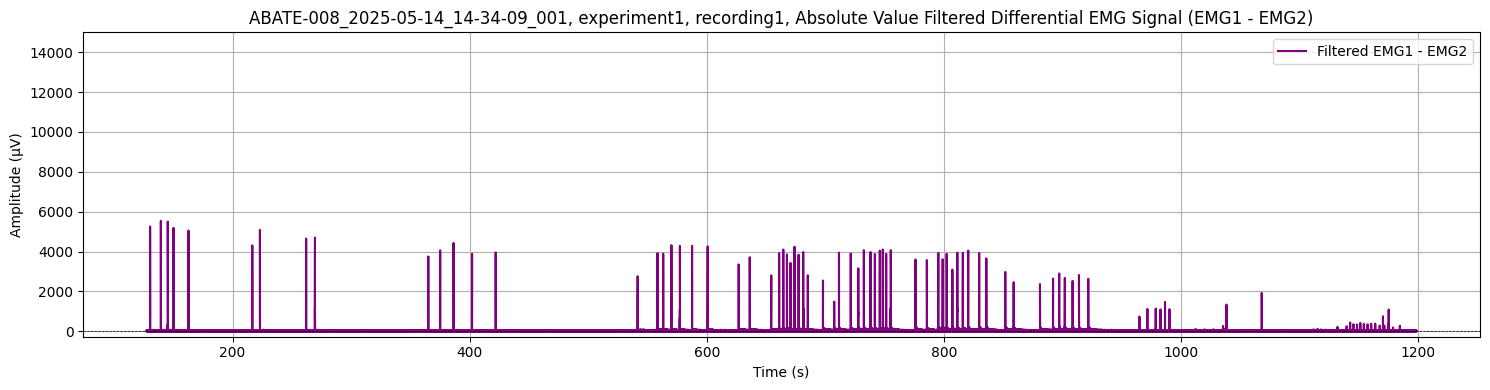

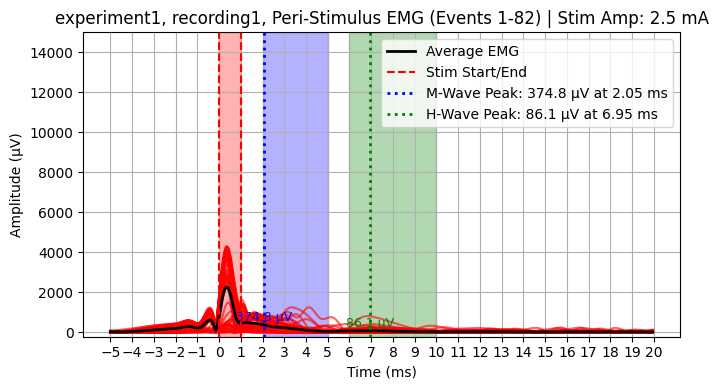

C:\Users\dal866445\AppData\Local\Temp\ipykernel_4644\64509338.py:343: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  m_sems  = [stats.sem(peaks) for peaks in m_wave_data]
C:\Users\dal866445\AppData\Local\Temp\ipykernel_4644\64509338.py:345: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_sems  = [stats.sem(peaks) for peaks in h_wave_data]


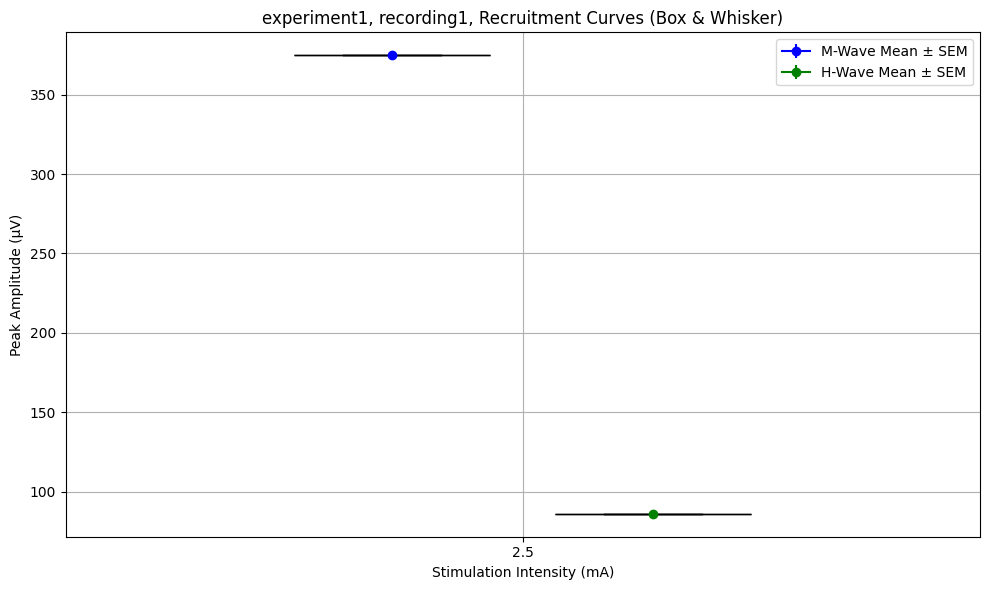

Processing: x=1, y=recording2, exp=experiment1, yy=recording2

EXPERIMENT1, Recording 2
Open Ephys GUI Recording
ID: 0x1a246b88ad0
Format: Binary
Directory: ABATE-008_2025-05-14_14-34-09_001\Record Node 111\experiment1\recording2
Experiment Index: 0
Recording Index: 1
Processor ID: 100, Stream Name: Rhythm Data, Line: 1 (main sync line))
  First event sample number: 30373844
  Last event sample number: 34051133
  Total sync events: 40
  Sample rate: 20000.0
Channels: ['CH1', 'CH5', 'CH7', 'CH11', 'ADC1'] 

Loaded 52 MessageCenter entries
[Time: 1474.934050 s] Message: Starting new recording
[Time: 1494.058500 s] Message: This will be an increasing current stim set in 0.5 mA steps 
[Time: 1514.161250 s] Message: Starting with 2.0 mA and Fast settle off.
[Time: 1518.400500 s] Message: Starting with 2.0 mA and Fast settle off.
[Time: 1518.678600 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 1521.431250 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 1523.704300 s] Message: RHDCONTROL TRIGGE

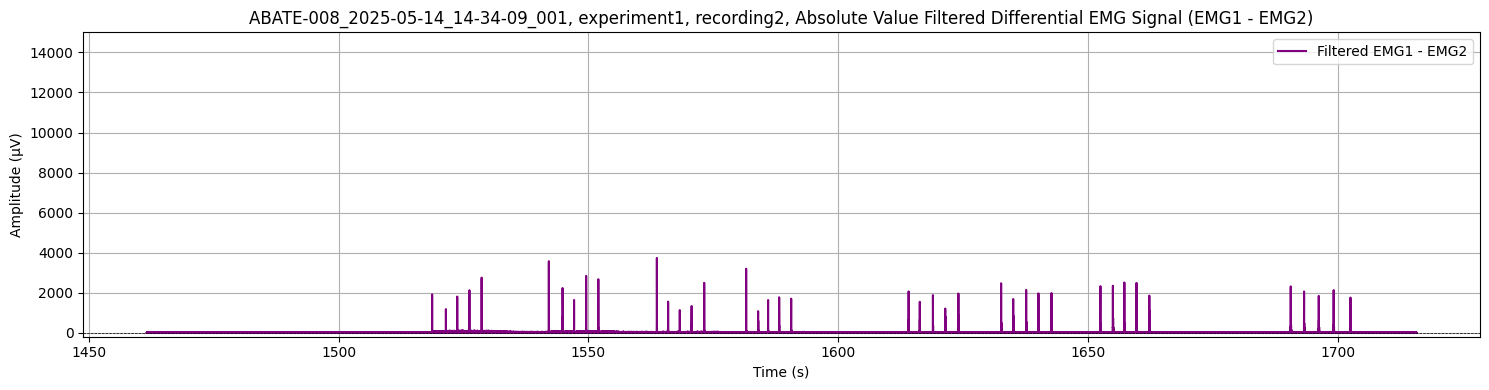

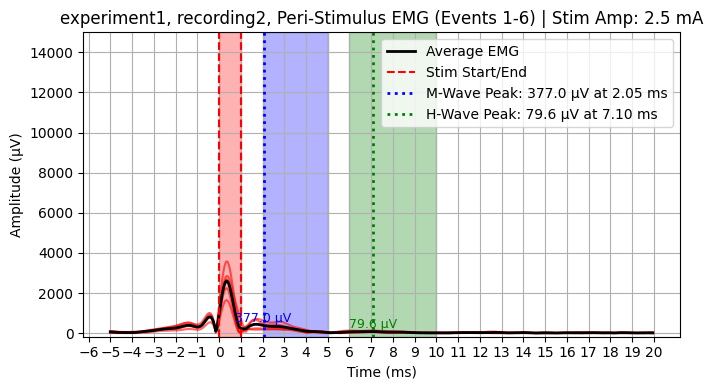

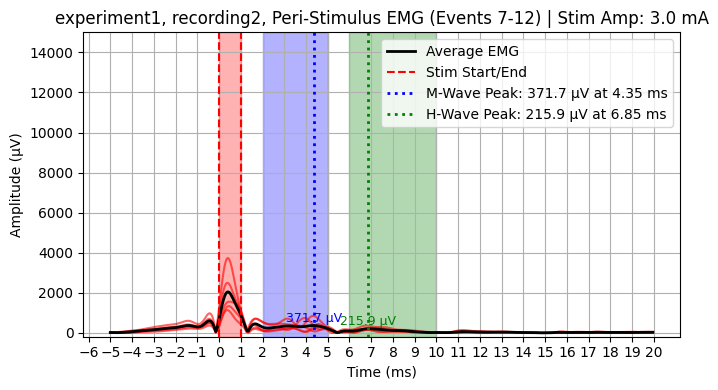

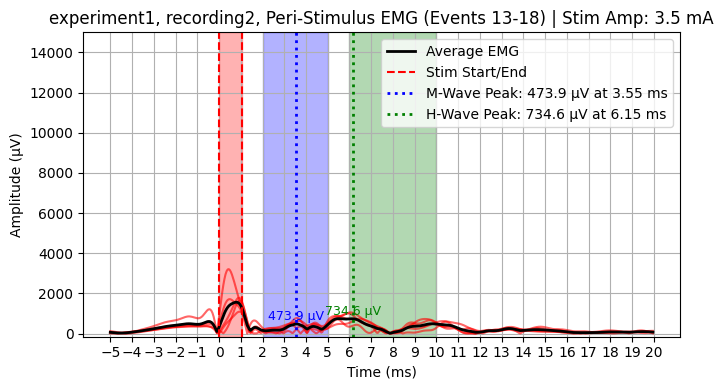

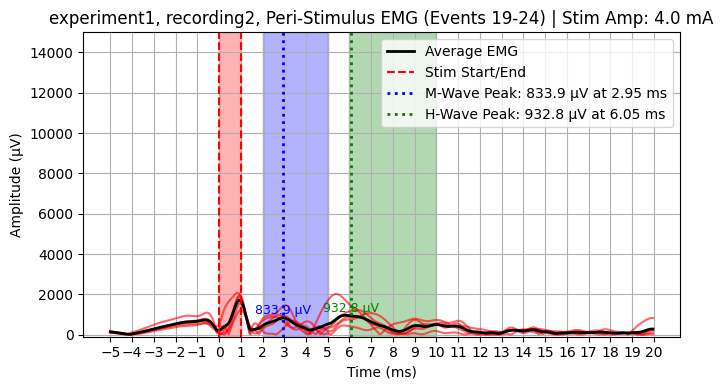

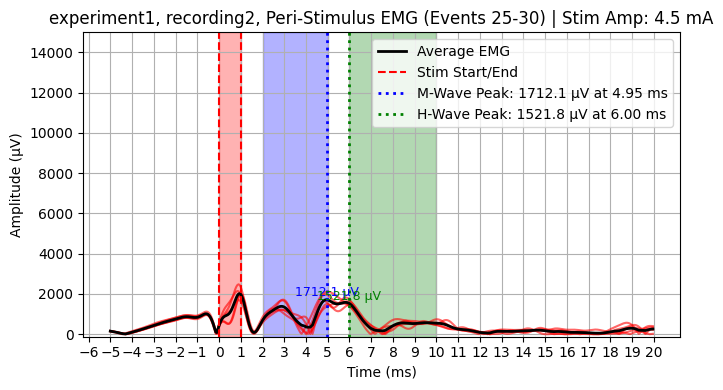

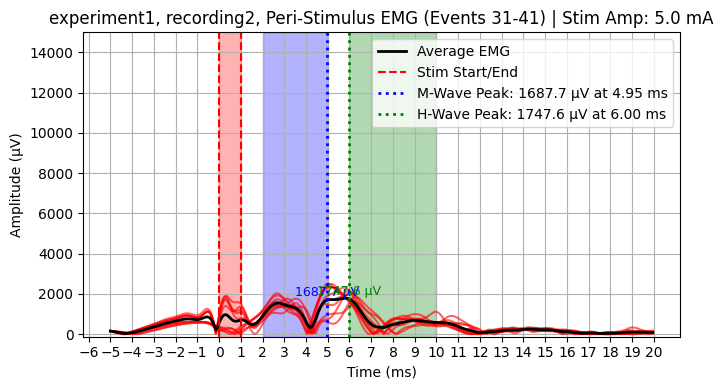

C:\Users\dal866445\AppData\Local\Temp\ipykernel_4644\64509338.py:343: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  m_sems  = [stats.sem(peaks) for peaks in m_wave_data]
C:\Users\dal866445\AppData\Local\Temp\ipykernel_4644\64509338.py:345: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_sems  = [stats.sem(peaks) for peaks in h_wave_data]


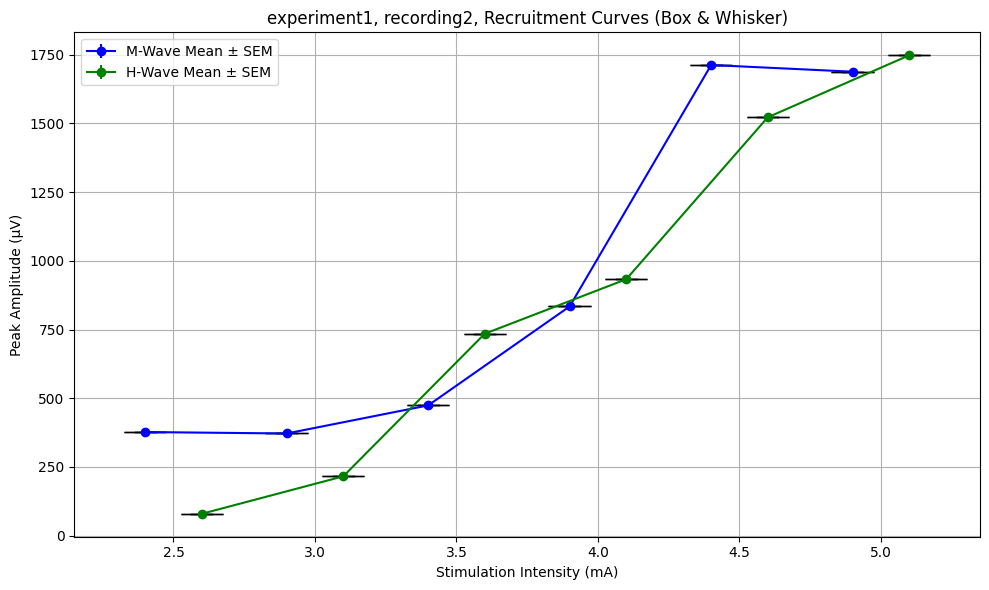

Processing: x=2, y=recording3, exp=experiment1, yy=recording3

EXPERIMENT1, Recording 3
Open Ephys GUI Recording
ID: 0x1a246b8b650
Format: Binary
Directory: ABATE-008_2025-05-14_14-34-09_001\Record Node 111\experiment1\recording3
Experiment Index: 0
Recording Index: 2
Processor ID: 100, Stream Name: Rhythm Data, Line: 1 (main sync line))
  First event sample number: 55859079
  Last event sample number: 70328761
  Total sync events: 142
  Sample rate: 20000.0
Channels: ['CH1', 'CH5', 'CH7', 'CH11', 'ADC1'] 

Loaded 173 MessageCenter entries
[Time: 2751.660300 s] Message: New recording file with all devices removed from cage and going through headcap for stim
[Time: 2786.820950 s] Message: Fast settle on @ 2.0 mA
[Time: 2792.940000 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 2795.702200 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 2798.263000 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 2800.353850 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 2802.953000 s] Message: RHDCONTROL TRIGG

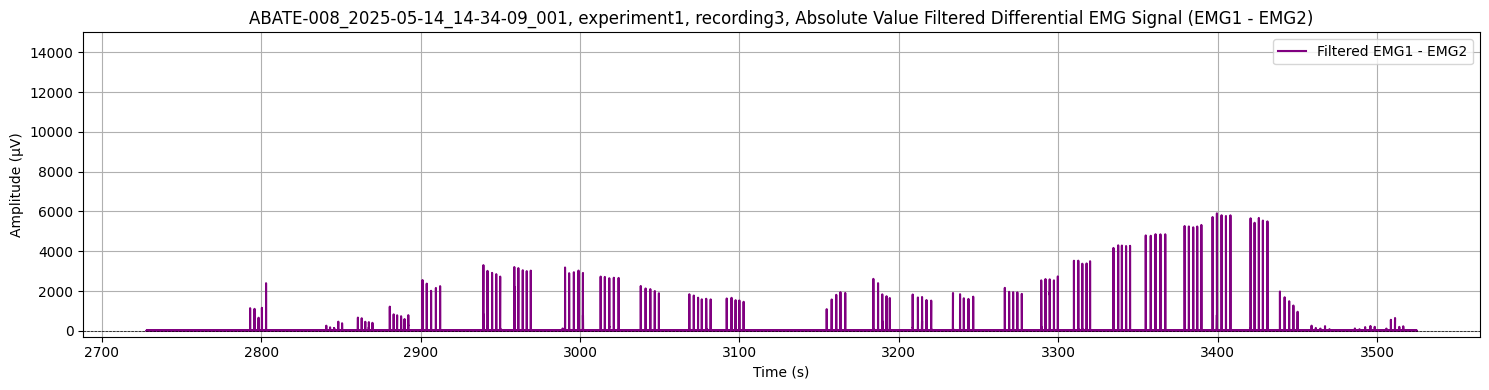

ValueError: List of boxplot statistics and `positions` values must have same the length

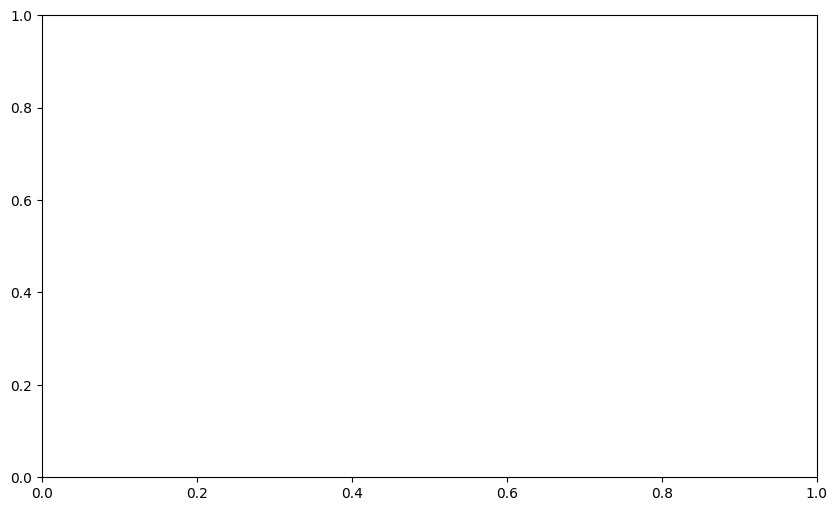

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from open_ephys.analysis import Session
import os
import re
from scipy.signal import butter, filtfilt
from collections import defaultdict
import scipy.stats as stats


# ==== Select Session ====
w = 1  # recordnode index 1 = Record Node 111 RAW
       # recordnode index 0 = Record Node 106 is Online Filtered


# ==== Define Filters ====
def bandpass_filter(data, fs, lowcut=100, highcut=1000, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')
    return filtfilt(b, a, data)

def full_filter(data, fs):
    return bandpass_filter(data, fs)

def scan_experiment_structure(session_dir, record_node_name="Record Node 106"):
    node_path = os.path.join(session_dir, record_node_name)
    
    if not os.path.exists(node_path):
        print(f"Record Node directory not found: {node_path}")
        return {}
    
    experiment_info = defaultdict(list)
    for item in sorted(os.listdir(node_path)):
        exp_path = os.path.join(node_path, item)
        if os.path.isdir(exp_path) and item.startswith("experiment"):
            recordings = [r for r in sorted(os.listdir(exp_path)) 
                          if os.path.isdir(os.path.join(exp_path, r)) and r.startswith("recording")]
            experiment_info[item] = recordings
    return experiment_info

# ==== Load Session ====
#directory = 'SNARE-40_2025-06-05_11-39-05_001'
#directory = 'SAP-55_2025-06-09_11-12-19_001'
directory = 'ABATE-008_2025-05-14_14-34-09_001'
#directory = 'SNARE-32_2025-06-04_11-14-37_001'
#directory = 'NHNCE-187_2025-05-16_10-28-20_001'
#directory = '2NHNCE-187_2025-05-16_11-34-10_001'
#directory = 'RAtname_2025-05-16_12-13-55_001'

session = Session(directory)
print('Pass Initial Test, Moving on to Loading Session...\n')

# === Scan structure ===
record_node_name = "Record Node 106" if w == 0 else "Record Node 111"
structure = scan_experiment_structure(directory, record_node_name)

# === Flatten experiment-recording pairs to loop ===
flat_recordings = []
for exp_name, rec_list in structure.items():
    for rec in rec_list:
        flat_recordings.append((exp_name, rec))

# === Iterate over recordings with x, y, yy convention ===
for x, (exp, yy) in enumerate(flat_recordings):
    y = f"recording{x + 1}"  # sequential label used in some parts of your code
    v = f"Record Node 106" if w == 0 else f"Record Node 111"
    i = 1

    try:
        recording = session.recordnodes[w].recordings[x]
    except IndexError:
        print(f"No recording {x+1} found in {exp}/{yy}")
        continue

    print(f"Processing: x={x}, y={y}, exp={exp}, yy={yy}")

    # ==== Sync Setup ====
    print(f"\n{exp.upper()}, Recording {x+1}")
    print(recording)

    # Only add sync line if a main one doesn't already exist
    has_main_sync = any(sync.get("main", False) for sync in recording.sync_lines)
    if not has_main_sync:
        recording.add_sync_line(1, 100, 'Rhythm Data', main=True)

    recording.compute_global_timestamps()

    metadata = recording.continuous[0].metadata
    channel_names = metadata['channel_names']
    print("Channels:", channel_names, '\n')

    timestamps = recording.continuous[0].timestamps
    data = recording.continuous[0].get_samples(start_sample_index=0, end_sample_index=len(timestamps))
    sample_rate = metadata['sample_rate']

    # ==== EMG Processing ====
    emg1_raw = data[:, 2]
    emg2_raw = data[:, 3]
    differential = (emg1_raw - emg2_raw)
    differential_filt = full_filter((differential), sample_rate)
    differential_emg = np.abs(differential_filt)

    # ==== Load ADC1 (for stim detection) ====
    adc1 = data[:, 4]  # adjust if your ADC1 channel index differs

    # ==== Sync Events ====
    events = recording.events
    sync_events = events[(events.line == 1) & (events.processor_id == 100) &
                            (events.stream_name == 'Rhythm Data') & (events.state == 1)]
    sync_timestamps = sync_events['timestamp'].to_numpy()

    # ==== Load MessageCenter ====
    messagecenter_dir = os.path.join(directory, v, exp, yy, "events", "MessageCenter")
    if not os.path.exists(messagecenter_dir):
        print(f"MessageCenter directory not found for {exp}/{yy}")
        continue

    texts = np.load(os.path.join(messagecenter_dir, "text.npy"), allow_pickle=True)
    timestamps_msg = np.load(os.path.join(messagecenter_dir, "timestamps.npy"))
    decoded_texts = [t.decode('utf-8') if isinstance(t, bytes) else str(t) for t in texts]
    message_entries = list(zip(timestamps_msg, decoded_texts))
    print(f"Loaded {len(decoded_texts)} MessageCenter entries")

    # ==== Debug Print ====
    for text, time in zip(decoded_texts, timestamps_msg):
        print(f"[Time: {time:.6f} s] Message: {text}")

    # ==== Full Trace Plot ====
    plt.figure(figsize=(15, 4))
    plt.plot(timestamps, differential_emg, label="Filtered EMG1 - EMG2", color='purple')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.title(f"{directory}, {exp}, {yy}, Absolute Value Filtered Differential EMG Signal (EMG1 - EMG2)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (μV)")
    plt.grid(True)
    plt.legend()
    plt.ylim(top=15000)
    plt.tight_layout()
    plt.show()

    # ==== Peri-Stimulus Analysis with Shaded Stimulus Duration ====
    pre_event_time = 5   # ms before calculated stim start
    post_event_time = 20 # ms after calculated stim start
    stim_threshold = 0.1 # ADC1 threshold to detect pulse (adjust if needed)

    peri_stim_segments = []
    segment_stim_end_times = []
    segment_stim_start_times = []

    for stamp in sync_timestamps:
        # First, find approximate sample index around the sync pulse
        idx_center = np.searchsorted(timestamps, stamp)
        # Define a generous window to locate true stim-onset in ADC1
        idx_search_start = np.searchsorted(timestamps, stamp - 0.010)  # 10 ms before sync
        idx_search_end   = np.searchsorted(timestamps, stamp + 0.010)  # 10 ms after sync

        if idx_search_start < 0 or idx_search_end > len(timestamps):
            continue

        adc1_segment_for_detection = adc1[idx_search_start:idx_search_end]
        time_segment_for_detection = timestamps[idx_search_start:idx_search_end]

        # Detect true stim start: first crossing above threshold in that window
        above_idxs = np.where(adc1_segment_for_detection > stim_threshold)[0]
        if len(above_idxs) == 0:
            continue
        stim_start_idx = idx_search_start + above_idxs[0]
        stim_start_time = timestamps[stim_start_idx]

        # Now define peri-stimulus window around this stim_start_time
        idx_pre  = int(stim_start_idx - (pre_event_time / 1000) * sample_rate)
        idx_post = int(stim_start_idx + (post_event_time / 1000) * sample_rate)

        if idx_pre < 0 or idx_post > len(timestamps):
            continue

        # Extract windows
        time_window = timestamps[idx_pre:idx_post]
        time_zeroed = time_window - stim_start_time  # in seconds

        emg_window  = differential_emg[idx_pre:idx_post]
        adc1_window = adc1[idx_pre:idx_post]

        # Detect stim end: first time after stim_start where ADC1 falls back below threshold
        post_onset_mask = (time_zeroed >= 0)
        adc1_post_onset = adc1_window[post_onset_mask]
        time_post_onset = time_zeroed[post_onset_mask]

        below_idxs = np.where(adc1_post_onset < stim_threshold)[0]
        if len(below_idxs) > 0:
            stim_end_time = time_post_onset[below_idxs[0]] * 1000  # convert to ms
        else:
            stim_end_time = post_event_time

        # Save for grouping
        peri_stim_segments.append((time_zeroed * 1000, emg_window, stim_end_time))
        segment_stim_start_times.append(stim_start_time)
        segment_stim_end_times.append(stim_end_time)


    # ==== Dynamically determine stimulation groups based on event messages ====

    # First, extract only trigger messages and stim setting messages
    trigger_pattern = re.compile(r"RHDCONTROL TRIGGER")
    stim_pattern = re.compile(r"starting(?: at)? (\d+\.?\d*)\s*mA", re.IGNORECASE)

    stim_groups = []
    current_group = []
    current_amp = None
    trigger_times = []

    for t, msg in message_entries:
        if stim_pattern.search(msg):
            # Save the previous group if any
            if current_amp is not None and current_group:
                stim_groups.append((current_amp, current_group))
            # Start new group
            current_amp = float(stim_pattern.search(msg).group(1))
            current_group = []
        elif trigger_pattern.search(msg):
            if current_amp is not None:
                current_group.append(t)
    
    # Don't forget to save the last group
    if current_amp is not None and current_group:
        stim_groups.append((current_amp, current_group))

    # ==== Match trigger times to peri_stim_segments ====
    # Create dictionary to associate each stim amplitude to its segments
    stim_intensities = []
    m_wave_peaks = []
    h_wave_peaks = []

    for stim_amp, trigger_times_group in stim_groups:
        # For each trigger time, find matching peri_stim segment (by start time)
        group_data = []
        group_start_times = []
        group_end_times = []

        for trig_time in trigger_times_group:
            # Find closest stim_start_time to this trigger time
            idx_match = np.argmin(np.abs(np.array(segment_stim_start_times) - trig_time))
            # Extra check: ensure it's reasonably close (e.g., within 100 ms)
            if abs(segment_stim_start_times[idx_match] - trig_time) < 0.1:
                group_data.append(peri_stim_segments[idx_match])
                group_start_times.append(segment_stim_start_times[idx_match])
                group_end_times.append(segment_stim_end_times[idx_match])

        if not group_data:
            continue  # skip if no valid matching data

        # Proceed with same logic as original
        time_ms_matrix = np.stack([gd[0] for gd in group_data])
        emg_matrix     = np.stack([gd[1] for gd in group_data])

        avg_time_ms = time_ms_matrix[0]  # identical for all in group
        avg_emg     = np.mean(emg_matrix, axis=0)
        avg_end_ms  = np.mean(group_end_times)

        stim_intensities.append(stim_amp)

        plt.figure(figsize=(7, 4))
        
        for (_, trace, _) in group_data:
            plt.plot(avg_time_ms, trace, color='red', alpha=0.6)
        plt.plot(avg_time_ms, avg_emg, color='black', linewidth=2, label='Average EMG')

        plt.axvline(x=0, color='red', linestyle='--', label='Stim Start/End')
        plt.axvline(x=avg_end_ms, color='red', linestyle='--', label='_nolegend_')
        plt.axvspan(0, avg_end_ms, color='red', alpha=0.3)

        m_wave_start, m_wave_end = 2, 5.0
        h_wave_start, h_wave_end = 6, 10

        plt.axvspan(m_wave_start, m_wave_end, color='blue', alpha=0.3)
        plt.axvspan(h_wave_start, h_wave_end, color='green', alpha=0.3)

        m_wave_mask = (avg_time_ms >= m_wave_start) & (avg_time_ms <= m_wave_end)
        m_wave_time_window = avg_time_ms[m_wave_mask]
        m_wave_emg_window = avg_emg[m_wave_mask]
        m_wave_peak_idx = np.argmax(m_wave_emg_window)
        m_wave_peak_time = m_wave_time_window[m_wave_peak_idx]
        m_wave_peak_amp = m_wave_emg_window[m_wave_peak_idx]
        m_wave_peaks.append(m_wave_peak_amp)

        h_wave_mask = (avg_time_ms >= h_wave_start) & (avg_time_ms <= h_wave_end)
        h_wave_time_window = avg_time_ms[h_wave_mask]
        h_wave_emg_window = avg_emg[h_wave_mask]
        h_wave_peak_idx = np.argmax(h_wave_emg_window)
        h_wave_peak_time = h_wave_time_window[h_wave_peak_idx]
        h_wave_peak_amp = h_wave_emg_window[h_wave_peak_idx]
        h_wave_peaks.append(h_wave_peak_amp)

        plt.axvline(x=m_wave_peak_time, color='blue', linestyle=':', linewidth=2,
                    label=f'M-Wave Peak: {m_wave_peak_amp:.1f} μV at {m_wave_peak_time:.2f} ms')
        plt.axvline(x=h_wave_peak_time, color='green', linestyle=':', linewidth=2,
                    label=f'H-Wave Peak: {h_wave_peak_amp:.1f} μV at {h_wave_peak_time:.2f} ms')

        plt.text(m_wave_peak_time, m_wave_peak_amp + 200, f'{m_wave_peak_amp:.1f} μV',
                 color='blue', fontsize=9, ha='center')
        plt.text(h_wave_peak_time, h_wave_peak_amp + 200, f'{h_wave_peak_amp:.1f} μV',
                 color='green', fontsize=9, ha='center')
        
        #plt.title(
        #    f"{exp}, {yy}, Peri-Stimulus EMG "
        #    f"(Triggers: {len(group_data)}) | Stim Amp: {stim_amp} mA"
        #)
        plt.title(
            f"{exp}, {yy}, Peri-Stimulus EMG "
            f"(Events {i}-{i + (1)*len(group_data)}) | Stim Amp: {stim_amp} mA"
        )
        plt.xlabel("Time (ms)")
        plt.ylabel("Amplitude (μV)")
        plt.grid(True)
        plt.legend()
        plt.ylim(top=15000)

        min_ms = int(np.floor(avg_time_ms[0]))
        max_ms = int(np.ceil(avg_time_ms[-1]))
        plt.xticks(np.arange(min_ms, max_ms + 1, 1))

        plt.tight_layout()
        plt.show()
        i = i + (1)*len(group_data) + 1
        

    # ==== Group peak amplitudes by stimulation intensity ====
    m_wave_dict = defaultdict(list)
    h_wave_dict = defaultdict(list)

    for amp, m_peak, h_peak in zip(stim_intensities, m_wave_peaks, h_wave_peaks):
        m_wave_dict[amp].append(m_peak)
        h_wave_dict[amp].append(h_peak)

    # Sort by stimulation intensity
    sorted_amps = sorted(set(stim_intensities))

    m_wave_data = [m_wave_dict[amp] for amp in sorted_amps]
    h_wave_data = [h_wave_dict[amp] for amp in sorted_amps]

    # Compute mean and SEM for overlay
    m_means = [np.mean(peaks) for peaks in m_wave_data]
    m_sems  = [stats.sem(peaks) for peaks in m_wave_data]
    h_means = [np.mean(peaks) for peaks in h_wave_data]
    h_sems  = [stats.sem(peaks) for peaks in h_wave_data]

    # ==== Plot Recruitment Curves as Box-and-Whisker ====
    fig, ax = plt.subplots(figsize=(10, 6))

    

    # Boxplots
    positions = np.arange(len(sorted_amps))  # for spacing
    box1 = ax.boxplot(m_wave_data, positions=positions - 0.2, widths=0.3,
                    patch_artist=True, boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='black'), labels=[f"{amp:.1f}" for amp in sorted_amps])
    box2 = ax.boxplot(h_wave_data, positions=positions + 0.2, widths=0.3,
                    patch_artist=True, boxprops=dict(facecolor='lightgreen'),
                    medianprops=dict(color='black'))

    # Overlay mean ± SEM
    ax.errorbar(positions - 0.2, m_means, yerr=m_sems, fmt='o-', color='blue', label='M-Wave Mean ± SEM')
    ax.errorbar(positions + 0.2, h_means, yerr=h_sems, fmt='o-', color='green', label='H-Wave Mean ± SEM')

    # Aesthetics
    ax.set_xticks(positions)
    ax.set_xticklabels([f"{amp:.1f}" for amp in sorted_amps])
    ax.set_xlabel("Stimulation Intensity (mA)")
    ax.set_ylabel("Peak Amplitude (μV)")
    ax.set_title(f"{exp}, {yy}, Recruitment Curves (Box & Whisker)")
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()


In [11]:
print(len(m_wave_data), len(sorted_amps))



0 0
